Luan Rodrigues Petruitis GU3008347

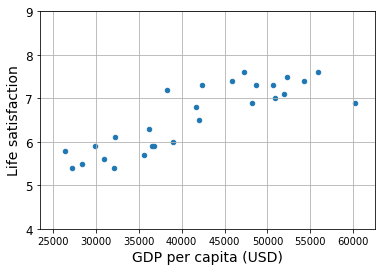

[[6.30165767]]


In [4]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Configurações do para realizar os plots
plt.rc('font', size=12)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=12)

np.random.seed(42)

# Preparando os dados
lifesat = pd.read_csv("./lifesat.csv")
# Pegando a variável base e o alvo
X = lifesat[["GDP per capita (USD)"]].values # base
y = lifesat[["Life satisfaction"]].values # alvo

# Gráfico com os dados
lifesat.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()


# Selecione o modelo de regressão
model = LinearRegression()
# treinando modelo de regressão linear
model.fit(X, y)

# Fazer uma previsão para o chipre
X_new = [[37_655.2]] # Pib per capita de Chipre em 2020

# Predizendo valores com o modelo treinado
print(model.predict(X_new))

In [5]:
# Substituindo o modelo d regressão linear por k-vizinhos mais próximos (neste exemplo para k=3)
# O alvo é previsto pela interpolação local dos alvos associados aos vizinhos mais próximos no conjunto de formação.
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
# Treinando
model.fit(X, y)
# Predizendo
print(model.predict(X_new))

[[6.33333333]]


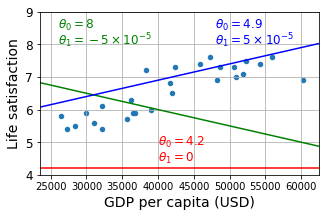

In [8]:
# Pegando os dados do dataset e colocando nas variáveis
oecd_bli = pd.read_csv("./oecd_bli.csv")
gdp_per_capita = pd.read_csv("./gdp_per_capita.csv")

# Definindo o ano e os eixos x e y
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

# Filtrando pelo ano definido
gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
# Retirando colunas que não são necessárias para o gráfico
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
# E criando uma nova coluna chamada Country 
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

# Definindo os valores mínimos e máximos de gdp
min_gdp = 23_500
max_gdp = 62_500

# Plotando gráfico do tipo scatter, com grid e seu tamanho, apontando x como pib per capita e o y grau de satisfação
lifesat.plot(kind='scatter', figsize=(5, 3), grid=True, x=gdppc_col, y=lifesat_col)
# Gerando array com do mínimo ao máximo definido para pib per capita
X = np.linspace(min_gdp, max_gdp, 1000)

# Adicionando linha e cálculos no gráfico para ficar mais explicito.
min_life_sat = 4
max_life_sat = 9
w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")
w1, w2 = 8, -5
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")
w1, w2 = 4.9, 5
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
#save_fig('tweaking_model_params_plot')
plt.show()

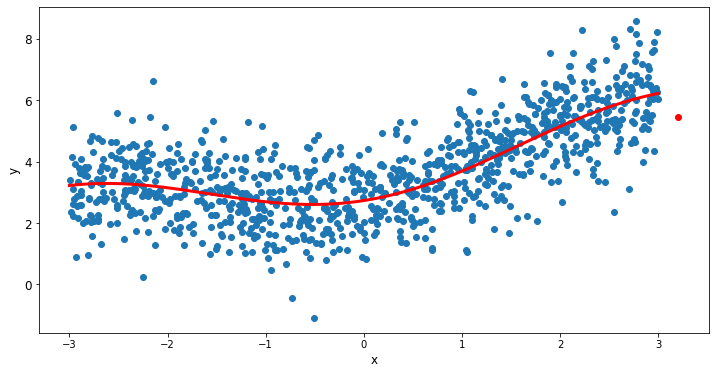

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

"""
Os pontos azuis representam os pares x e y e a linha vermelha e a função 𝑓(𝑥).
O ponto em vermelho representa o ponto teste que queremos predizer.
É possível notar que 𝑓(𝑥) tem um comportamento não linear devido a presença da raiz quadrada e do cosseno na função.
"""

def f(x):
	return .5 * x + np.sqrt(np.max(x, 0)) - np.cos(x) + 2

N = 1000
sigma_epsilon = 1
x_max = 3
x_test = 3.2
x = x_max * (2 * np.random.rand(N) - 1)
epsilon = sigma_epsilon * np.random.randn(N)
y = f(x) + epsilon
y_test = f(x_test) + sigma_epsilon * np.random.randn()
plt.figure(figsize=(12, 6))
x_range = np.linspace(-x_max, x_max, 1000)
plt.scatter(x, y)
plt.plot(x_range, f(x_range), 'r', linewidth=3.0)
plt.scatter(x_test, y_test, c='r')
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.xticks(np.arange(-x_max, x_max + 1))
plt.show()

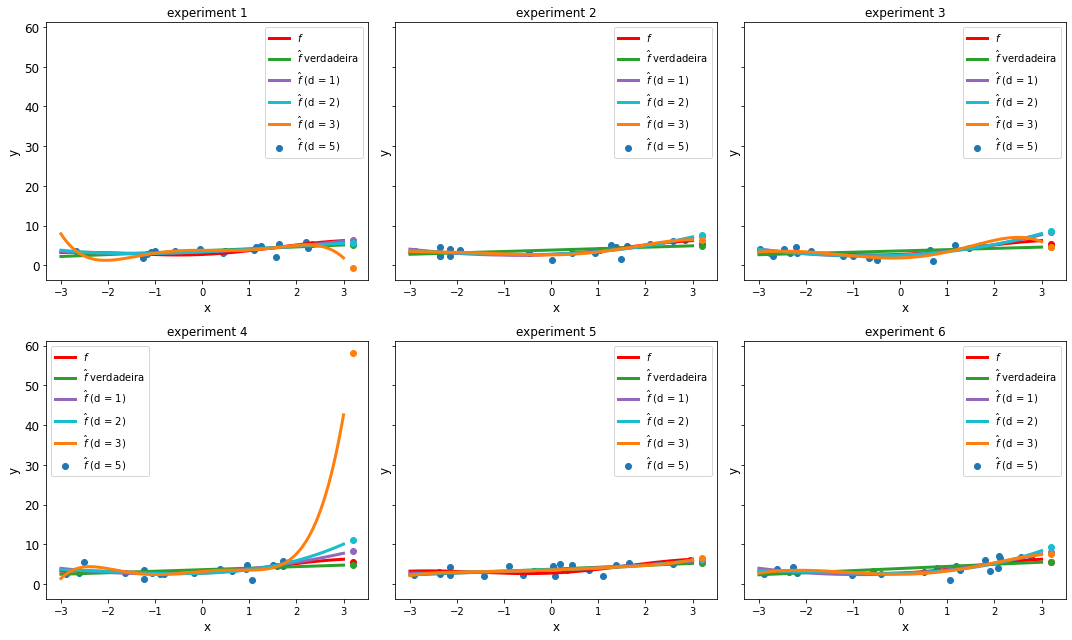

In [15]:
"""
Os pontos azuis representam os 20 pontos. A linha vermelha é a função obtida no gráfico anterior por regressão linear. Os pontos verde, roxo e azul claro e laranja representam a previsão do valor de x para cada regressão polinomial. É possível observar que temos menos variação no comportamento das linhas com menor grau de complexidade. em d = 1 em verde corresponde a uma função de primeiro grau, que não muda com a variação dos dado de treinamento. Já a linha 𝑑 = 5 em laranja é mais sensivel a pequenas flutuações nos dados de treinamento.
"""
# Regressão polinomial


def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

n = int(.02 * N)
x_test = 3.2
x_range = np.linspace(-x_max, x_max, 1000)
colors = np.array(['tab:green', 'tab:purple', 'tab:cyan', 'tab:orange'])
d_arr = [1, 2, 3, 5]
cnt = 1
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 9))
for i in range(2):
    for j in range(3):
        idx = np.random.permutation(N)[:n]
        x_train, y_train = x[idx], y[idx]
        w = []
        for d in d_arr:
            w.append(np.polyfit(x_train, y_train, d))

        axs[i, j].scatter(x_train, y_train)
        axs[i, j].plot(x_range, f(x_range), 'r', linewidth=3.0)
        for k in range(len(w)):
            axs[i, j].plot(x_range, f_hat(x_range, w[k]), colors[k], linewidth=3.0)
        axs[i, j].scatter(x_test, y_test, c='r')
        for k in range(len(w)):
            axs[i, j].scatter(x_test, f_hat(x_test, w[k]), c=colors[k])
            
        axs[i, j].set_xlabel('x', size=12)
        axs[i, j].set_ylabel('y', size=12)
        axs[i, j].legend([r'$f$', r'$\hat{f}$ verdadeira', r'$\hat{f}$ (d = 1)',
        r'$\hat{f}$ (d = 2)', r'$\hat{f}$ (d = 3)',r'$\hat{f}$ (d = 5)'], fontsize=10)
        axs[i, j].title.set_text('experiment {}'.format(cnt))
        cnt += 1
plt.tight_layout()
plt.show()

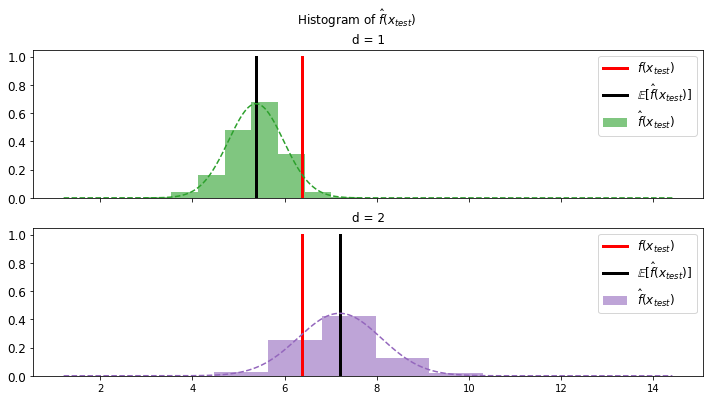

In [16]:
"""
Simulando 10000 experimentos diferentes, aleatórios buscando 20 pontos da população, para cada 
experimento dado um valor de 𝑥, vamos obter sua resultante ̂ 𝑓(𝑥), assim teremos 10 mil previsões
de ̂ 𝑓(𝑥). Faremos isso para os dois modelos de regressão de grau 1 (d=1) e grau 2 (d=2).
Com esses dados obteremos a média dos valores 𝐸[ ̂ 𝑓(𝑥)], a média do resultado real f(x) e os valores
preditos ̂ 𝑓(𝑥) em um histograma.
"""

R = 10000
d_arr = [1, 2, 3, 5]
y_hat_test = np.zeros((len(d_arr), R))
for r in range(R):
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]
    for k in range(len(d_arr)):
        d = d_arr[k]
        w = np.polyfit(x_train, y_train, d)
        y_hat_test[k, r] = f_hat(x_test, w)


y_hat_test_mean = np.mean(y_hat_test, 1)
y_hat_test_std = np.std(y_hat_test, 1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))
for k in range(2):
    axs[k].hist(y_hat_test[k], density=True, color=colors[k], alpha=0.6)
    xlim = axs[k].get_xlim()
    axs[k].plot([f(x_test), f(x_test)], [0, 1], 'r', linewidth=3.0)
    axs[k].plot([y_hat_test_mean[k], y_hat_test_mean[k]], [0, 1], c='k',linewidth=3.0)
    axs[k].title.set_text('d = {}'.format(d_arr[k]))
    axs[k].legend([r'$f(x_{test})$', r'$\mathbb{E}[\hat{f}(x_{test})]$',r'$\hat{f}(x_{test})$'], fontsize=12)
for k in range(2):
    x_range = np.linspace(xlim[0], xlim[1], 1000)
    axs[k].plot(x_range, stats.norm.pdf(x_range, y_hat_test_mean[k],y_hat_test_std[k]), color=colors[k], ls='--')
    
plt.suptitle(r'Histogram of $\hat{f}(x_{test})$', size=12)
plt.show()

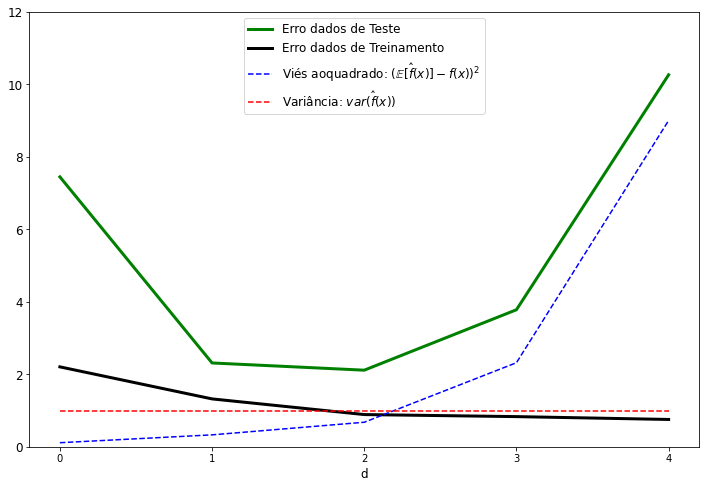

'\nSomando as linhas amarela (viés ao quadrado), azul (variância) e vermelha (erros de ruído) temos\n\na relação viés variância.\n\nA linha preta representa o MSE = Erro Médio Quadrático, que reduz com a complexidade do\n\nmodelo, visto que modelos mais complexos se ajustam melhor aos dados de treinamento.\n\nO melhor resultado para o modelo corresponde ao modelo quadrático (𝑑 = 2)\n'

In [17]:
"""
A média de ̂ 𝑓(𝑥) representada pela linha preta está mais longe da média dos valores verdadeiros

𝑓(𝑥), representado pela linha em vermelho. Comparando as funções de primero e segundo grau.

Essa diferença entre as médias das funções de primeiro e segundo grau, representa o viés, ou seja

o desvio entre os resultados do modelo e o valor real, causado pela simplicidade do modelo.

Por outro lado a variância é maior no modelo quadrático em comparação ao modelo linear. Isso

pode ser observado pela maior dispersão do histograma em roxo.
"""

R = 10000
n = int(.02 * N)
n_test = 1000
d_arr = np.arange(5)
x_test = x_max + np.random.rand(n_test) - .5
epsilon = sigma_epsilon * np.random.randn(n_test)
y_test = f(x_test) + epsilon
train_squared_error = np.zeros((len(d_arr), R))
y_hat_test = np.zeros((len(d_arr), R, n_test))
for r in range(R):
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]

    for k in range(len(d_arr)):
        d = d_arr[k]
        w = np.polyfit(x_train, y_train, d)
        train_squared_error[k, r] = np.mean((y_train - f_hat(x_train, w)) ** 2)
        y_hat_test[k, r, :] = f_hat(x_test, w)

test_squared_error = np.mean((y_hat_test - y_test) ** 2, 1)
bias_squared = (np.mean(y_hat_test, 1) - f(x_test)) ** 2
var_y_hat_test = np.var(y_hat_test, 1)
plt.figure(figsize=(12, 8))
plt.plot(d_arr, np.mean(test_squared_error, 1), 'g', linewidth=3.0)
plt.plot(d_arr, np.mean(train_squared_error, 1), 'k', linewidth=3.0)
plt.plot(d_arr, np.mean(var_y_hat_test, 1), 'b--')
plt.plot(d_arr, (sigma_epsilon ** 2) * np.ones_like(d_arr), 'r--')
plt.xticks(d_arr)
plt.xlabel('d', size=12)
plt.legend(['Erro dados de Teste', 'Erro dados de Treinamento', r'Viés aoquadrado: $(\mathbb{E}[\hat{f}(x)] - f(x))^2$',
r'Variância: $var(\hat{f}(x))$', r'Erro de ruído:$\sigma_\epsilon^2$'], loc='upper center', fontsize=12)
plt.ylim([0, 12])
plt.show()

"""
Somando as linhas amarela (viés ao quadrado), azul (variância) e vermelha (erros de ruído) temos a relação viés variância.

A linha preta representa o MSE = Erro Médio Quadrático, que reduz com a complexidade do

modelo, visto que modelos mais complexos se ajustam melhor aos dados de treinamento.

O melhor resultado para o modelo corresponde ao modelo quadrático (𝑑 = 2)
"""

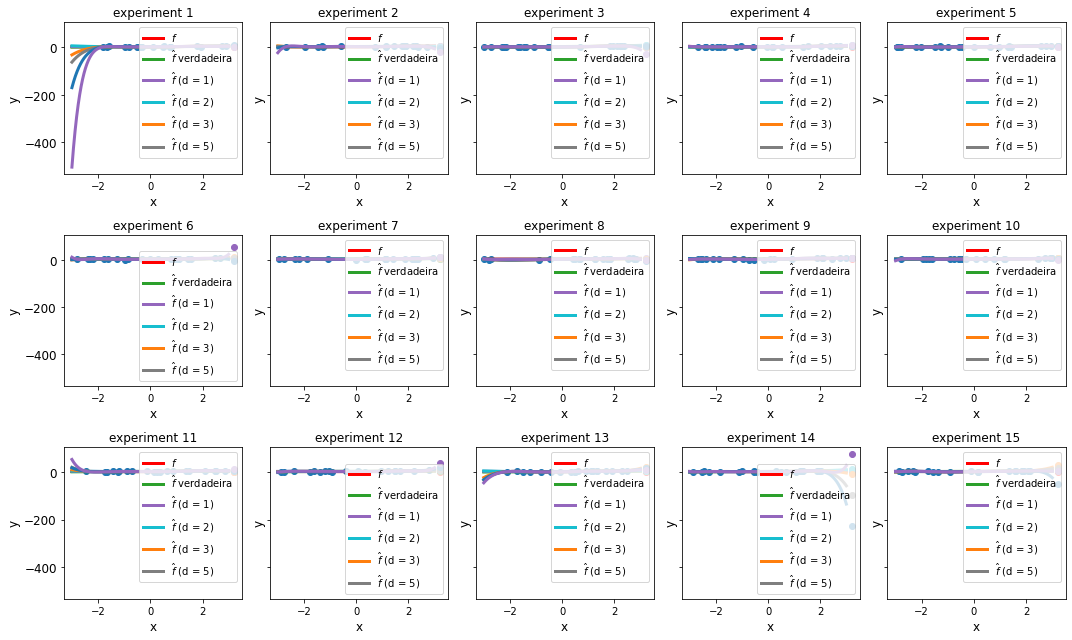

In [18]:

# Regressão polinomial de 8 graus

def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

n = int(.02 * N)
x_test = 3.2
y_test = x_test
x_range = np.linspace(-x_max, x_max, 1000)
colors = np.array(['tab:green', 'tab:purple', 'tab:cyan', 'tab:orange', 'tab:gray', 'tab:blue', 'tab:purple', 'tab:red'])
d_arr = [1, 2, 3, 5, 6, 7 ,8]
cnt = 1
fig, axs = plt.subplots(3, 5, sharey=True, figsize=(15, 9))
for i in range(3):
    for j in range(5):
        idx = np.random.permutation(N)[:n]
        x_train, y_train = x[idx], y[idx]
        w = []
        for d in d_arr:
            w.append(np.polyfit(x_train, y_train, d))

        axs[i, j].scatter(x_train, y_train)
        axs[i, j].plot(x_range, f(x_range), 'r', linewidth=3.0)
        for k in range(len(w)):
            axs[i, j].plot(x_range, f_hat(x_range, w[k]), colors[k], linewidth=3.0)
        axs[i, j].scatter(x_test, y_test, c='r')
        for k in range(len(w)):
            axs[i, j].scatter(x_test, f_hat(x_test, w[k]), c=colors[k])
            
        axs[i, j].set_xlabel('x', size=12)
        axs[i, j].set_ylabel('y', size=12)
        axs[i, j].legend([r'$f$', r'$\hat{f}$ verdadeira', r'$\hat{f}$ (d = 1)',
        r'$\hat{f}$ (d = 2)', r'$\hat{f}$ (d = 3)',r'$\hat{f}$ (d = 5)'], fontsize=10)
        axs[i, j].title.set_text('experiment {}'.format(cnt))
        cnt += 1
plt.tight_layout()
plt.show()